In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl # 잘 사용하지 않음

### 산점도(scatter plot) >> 이산자료이므로 색 구분이 필요함
#### ## 1. 전체가 주어졌을 때, 독립변인이 어느정도의 비율을 차지하고 있는지를 효율적으로 시각화
#### ## 2. 두 변수 간의 **상관관계** 파악

### heatmap :

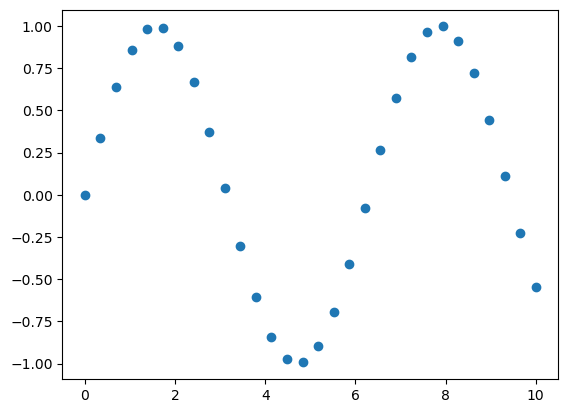

In [2]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.scatter(x,y)

c:\Users\user\miniconda3\envs\aip\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


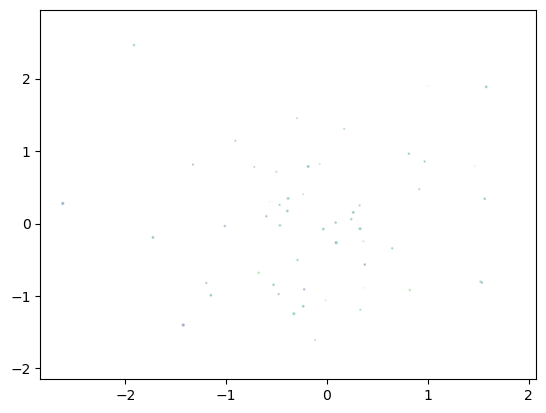

In [19]:
nrg = np.random.RandomState(42)
x = nrg.randn(100)
y = nrg.randn(100)
color = nrg.randn(100)
sizes = nrg.randn(100)
plt.scatter(x,y,c=color, s=sizes, alpha=0.3)

In [28]:
# sklearn 에서 제공하는 샘플 데이터 --> 딕셔너리!!
from sklearn.datasets import load_iris 
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

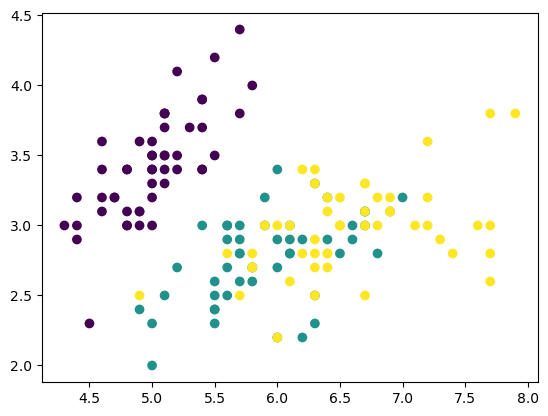

In [ ]:
feat = iris.data.T # 왜 데이터를 전치시키는지?
plt.scatter(feat[0],feat[1], c=iris.target) #첫 번째 독립변인과 두번째 독립변인의 상관관계를 산점도로 그릴 수 있음 # iris.target는 현재 0,1,2로 구분되어있음

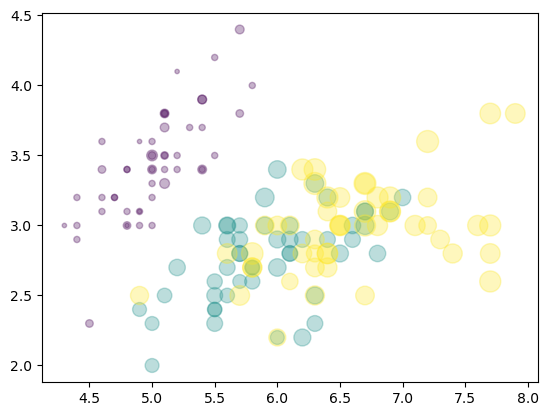

In [ ]:
plt.scatter(feat[0],feat[1], c=iris.target, s= 100*feat[3], alpha= 0.3) 
#첫 번째 독립변인과 두번째 독립변인의 상관관계를 표현하면서, 세번째 독립변인의 영향력을 점의 사이즈로 표현
### 유용하지 않은 정보임!! >> 이런 산점도는 사용하지 않기

### 히스토그램 : 데이터를 분석하는데 가장 유용한 자료 
#### ## 왜? 1. 중심극한정리: 데이터가 충분하게 많다면 정규분포에 가까워짐
#### ##     >> 데이터에 대한 정보가 없을 때는, 정규분포에 가까운 히스토그램을 그리는 데이터부터 분석하는 것이 유리함

(array([ 12.,  40., 102., 188., 204., 208., 153.,  63.,  23.,   7.]),
 array([-2.69572812, -2.12537165, -1.55501518, -0.98465872, -0.41430225,
         0.15605422,  0.72641069,  1.29676716,  1.86712363,  2.43748009,
         3.00783656]),
 <BarContainer object of 10 artists>)

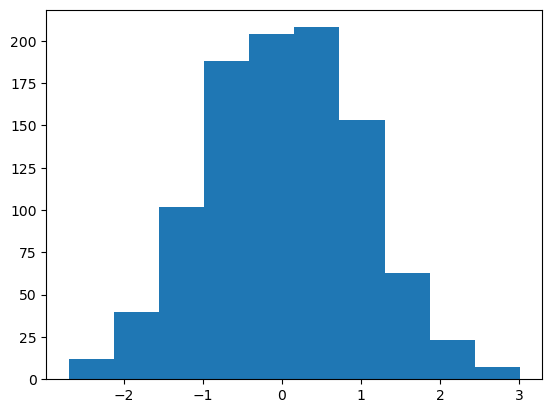

In [35]:
data = np.random.randn(1000)
plt.hist(data)

In [38]:
# pairplot 그리기 -> 자신은(대각선 방향) 막대그래프로, 다른 독립변인과의 관계는 산점도로 그림
from sklearn.datasets import load_iris # 샘플 데이터 불러오기

plt.rcParams["font.family"] = "Malgun Gothic" # 한글 폰트 설정
plt.rcParams["axes.unicode_minus"] = False # 한글폰트 설정하면서 발생하는 - 문제를 해결

In [77]:
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(feature_names), print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


(None, None)

In [40]:
df = pd.DataFrame(x, columns=feature_names)
df["species"] = [str(iris.target_names[i]) for i in y]

In [41]:
feature_names_kr = ["꽃받침 길이", "꽃받침 너비", "꽃잎 길이", "꽃잎 너비"]
target_names_kr = ["세토사", "버시컬러", "버지니카"]

In [65]:
colors = ["#FF6B6B","#4ECDC4","#45B7D1"] # 색을 미리 세팅해두기
species_colors = {target_names[i]: colors[i] for i in range(3)}

### 특성간 관계분석

(4, 4)


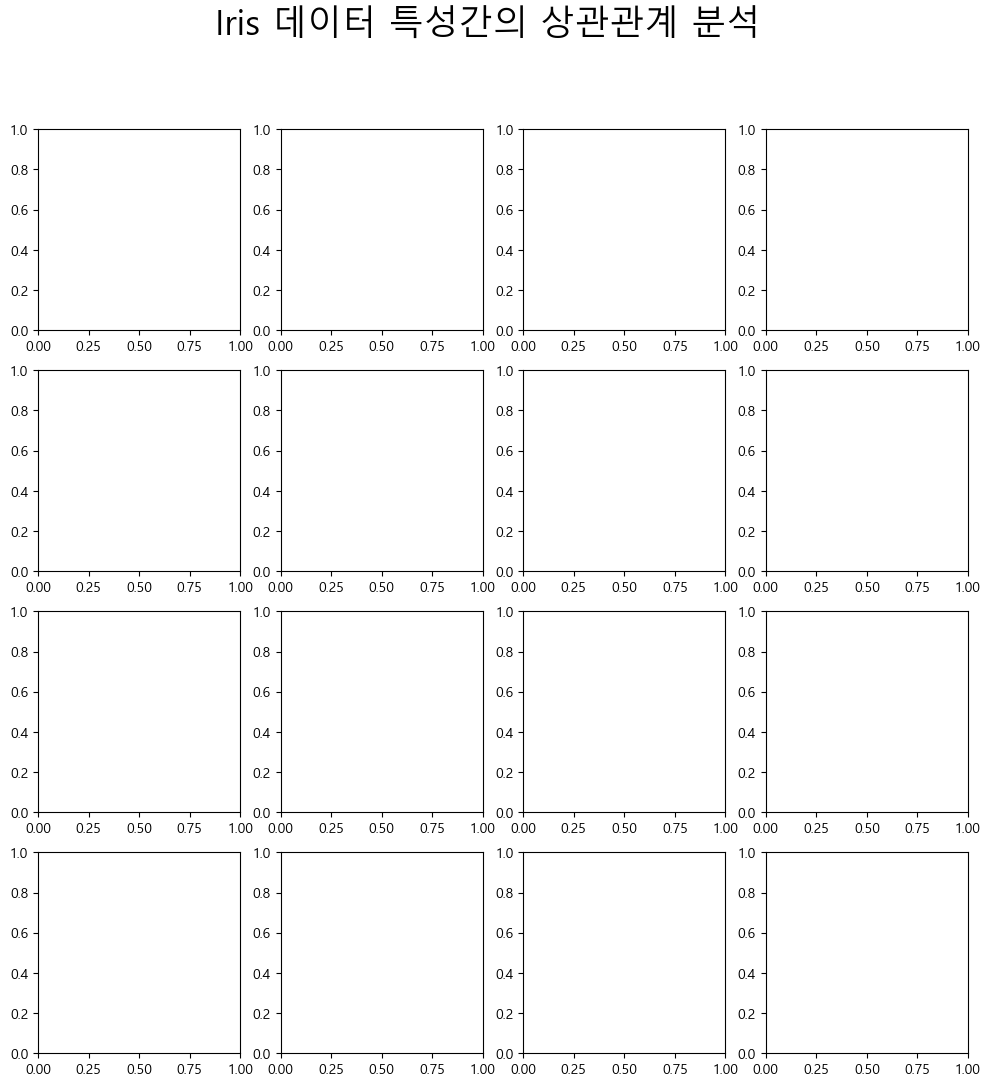

In [ ]:
# 4*4 행렬 형태의 그래프 만들기
fig, axes = plt.subplots(4,4, figsize=(12,12))
fig.suptitle("Iris 데이터 특성간의 상관관계 분석", fontsize = 25)
print(axes.shape)

In [ ]:
for i in range(4):
    for j in range(4):
        print(i,j) 
# 그래프에 이름붙이기
# (0,0) (0,1) (0,2) (0,3)
# (1,0) (1,1) (1,2) (1,3)
# (2,0) (2,1) (2,2) (2,3)
# (3,0) (3,1) (3,2) (3,3)


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


(4, 4)


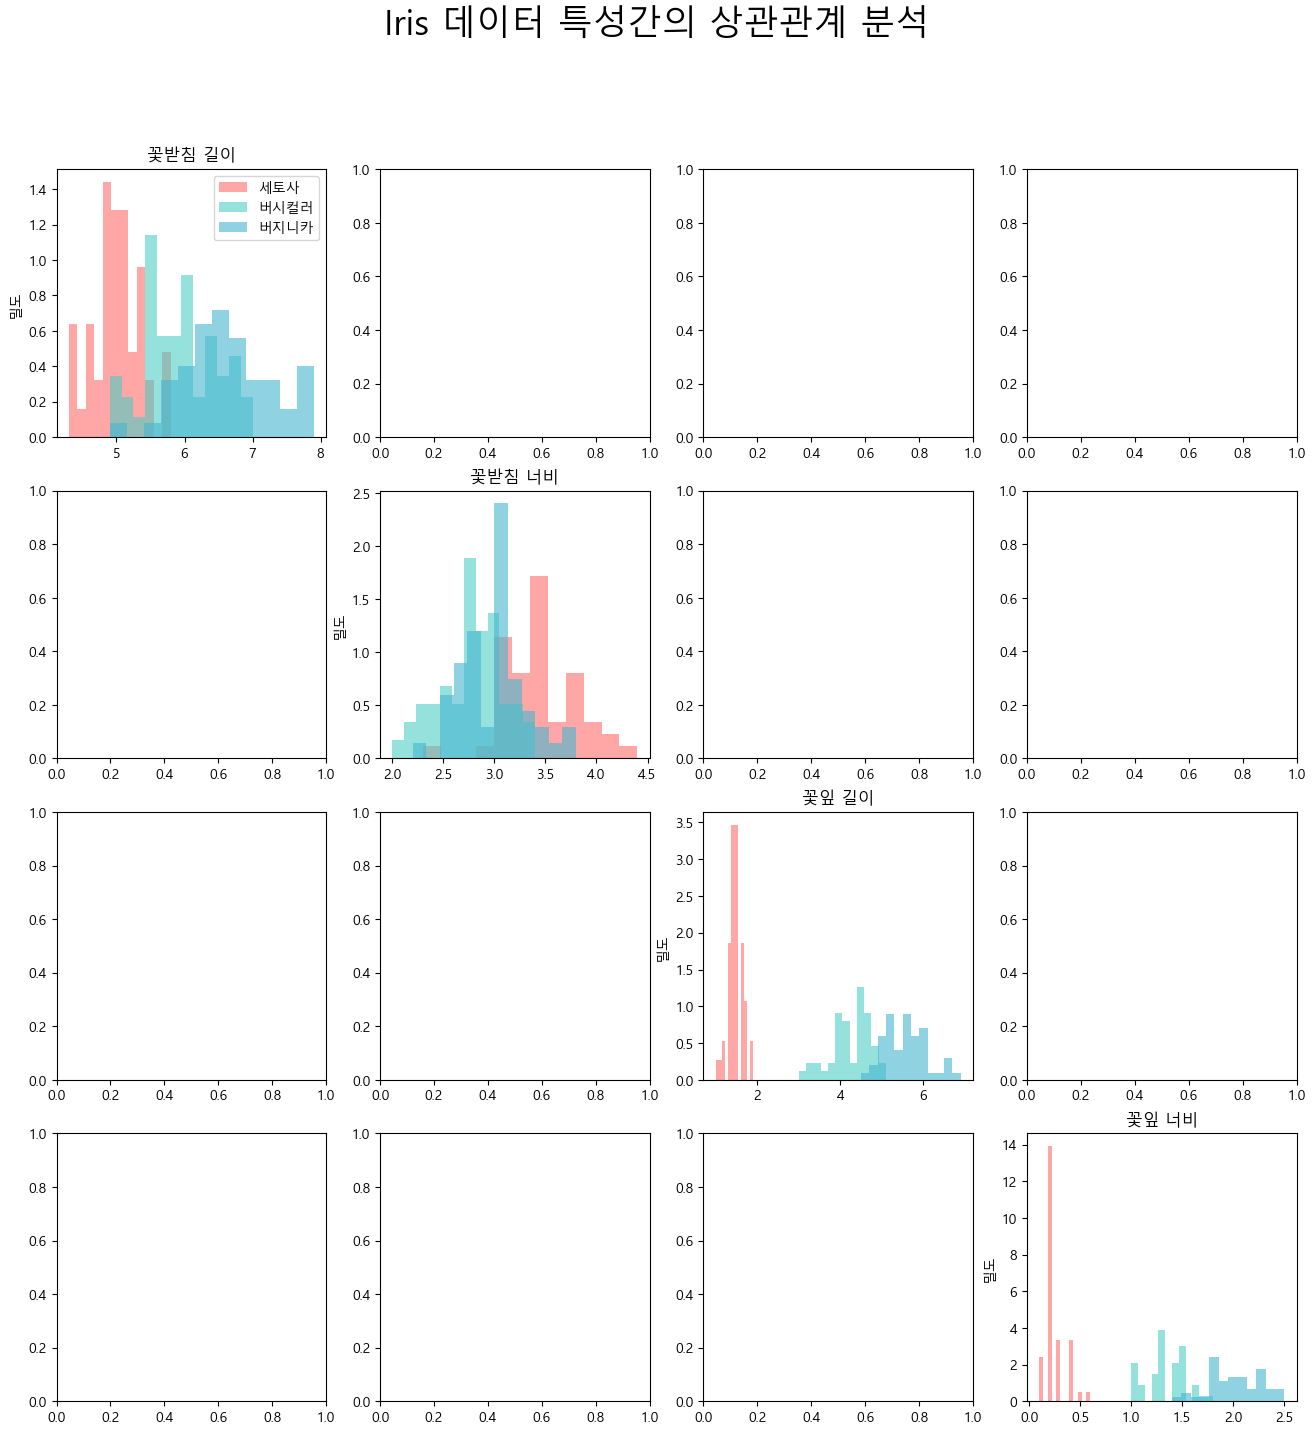

In [81]:
fig, axes = plt.subplots(4,4, figsize=(16,16))
fig.suptitle("Iris 데이터 특성간의 상관관계 분석", fontsize = 25)
print(axes.shape)

for i in range(4):
    for j in range(4):
       ax = axes[i,j] # 그래프에 이름붙이기
       if i==j: # i = j (대각선)만 막대그래프로 먼저 처리
         #ax.plot([1,2],[2,1]) #(1,2),(2,1)을 이은 선
         #히스토그램을 만들기 위해 데이터 정리 필요
         for k, species in enumerate(target_names):
            data = df[df["species"]==species].iloc[:,i]
            ax.hist(data, 
                    bins = 12, # bins : 구간의 갯수 고정하기
                    color = colors[k],
                    density = True, # 밀도
                    alpha = 0.6, 
                    label = target_names_kr[k]) 
         ax.set_title(feature_names_kr[i])
         #ax.set_ylabel("갯수")
         ax.set_ylabel("밀도")
         if i == 0:
            ax.legend()

In [ ]:
df[df['species'] == "setosa"] #"setosa"라는 종이 가진 데이터만 분류

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


(array([ 5.,  0., 29.,  7.,  0.,  0.,  7.,  0.,  1.,  1.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

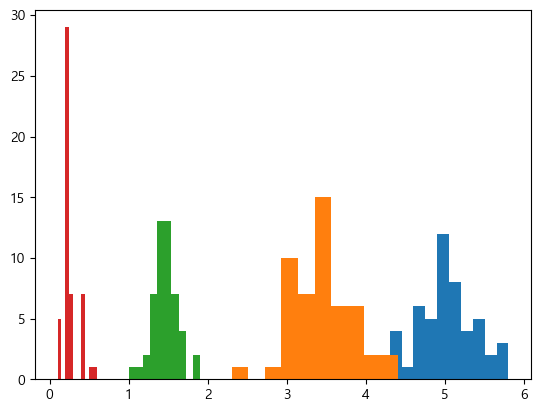

In [ ]:
# setosa 라는 종의 sepal length (cm), sepal width (cm),	petal length (cm),	petal width (cm) >> 한 컬럼씩 분류하기
data0 = df[df['species'] == "setosa"].iloc[:,0]
data1 = df[df['species'] == "setosa"].iloc[:,1]
data2 = df[df['species'] == "setosa"].iloc[:,2]
data3 = df[df['species'] == "setosa"].iloc[:,3]
plt.hist(data0) # 히스토그램은 도수분포표가 필요한데, plt.hist()에서는 데이터를 주면 알아서 도수분포표를 그려줌
plt.hist(data1)
plt.hist(data2)
plt.hist(data3)

## 대각선 방향의 원하는 데이터가 아님 >> 밑에서 수정

(array([ 1.,  5., 12.,  4.,  9.,  8.,  5.,  2.,  1.,  3.]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <BarContainer object of 10 artists>)

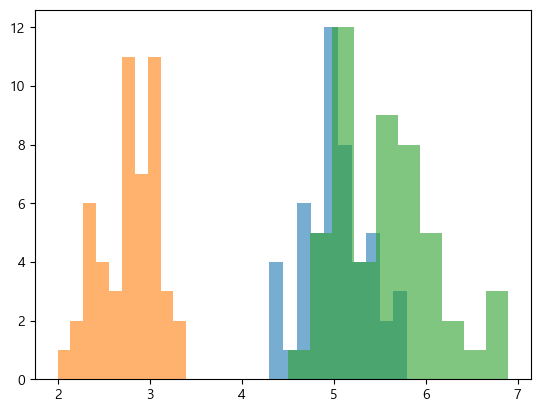

In [ ]:
## 대각선 방향의 원하는 데이터 : x 축은 종/y축은 특징 하나씩
data0 = df[df['species']==target_names[0]].iloc[:,0]
data1 = df[df['species']==target_names[1]].iloc[:,1]
data2 = df[df['species']==target_names[2]].iloc[:,2]
# data3 = df[df['species']==target_names[3]].iloc[:,3] # target_names 는 인덱스 0,1,2 까지만있음
plt.hist(data0, alpha = 0.6)
plt.hist(data1, alpha = 0.6)
plt.hist(data2, alpha = 0.6)
# plt.hist(data3)


(4, 4)


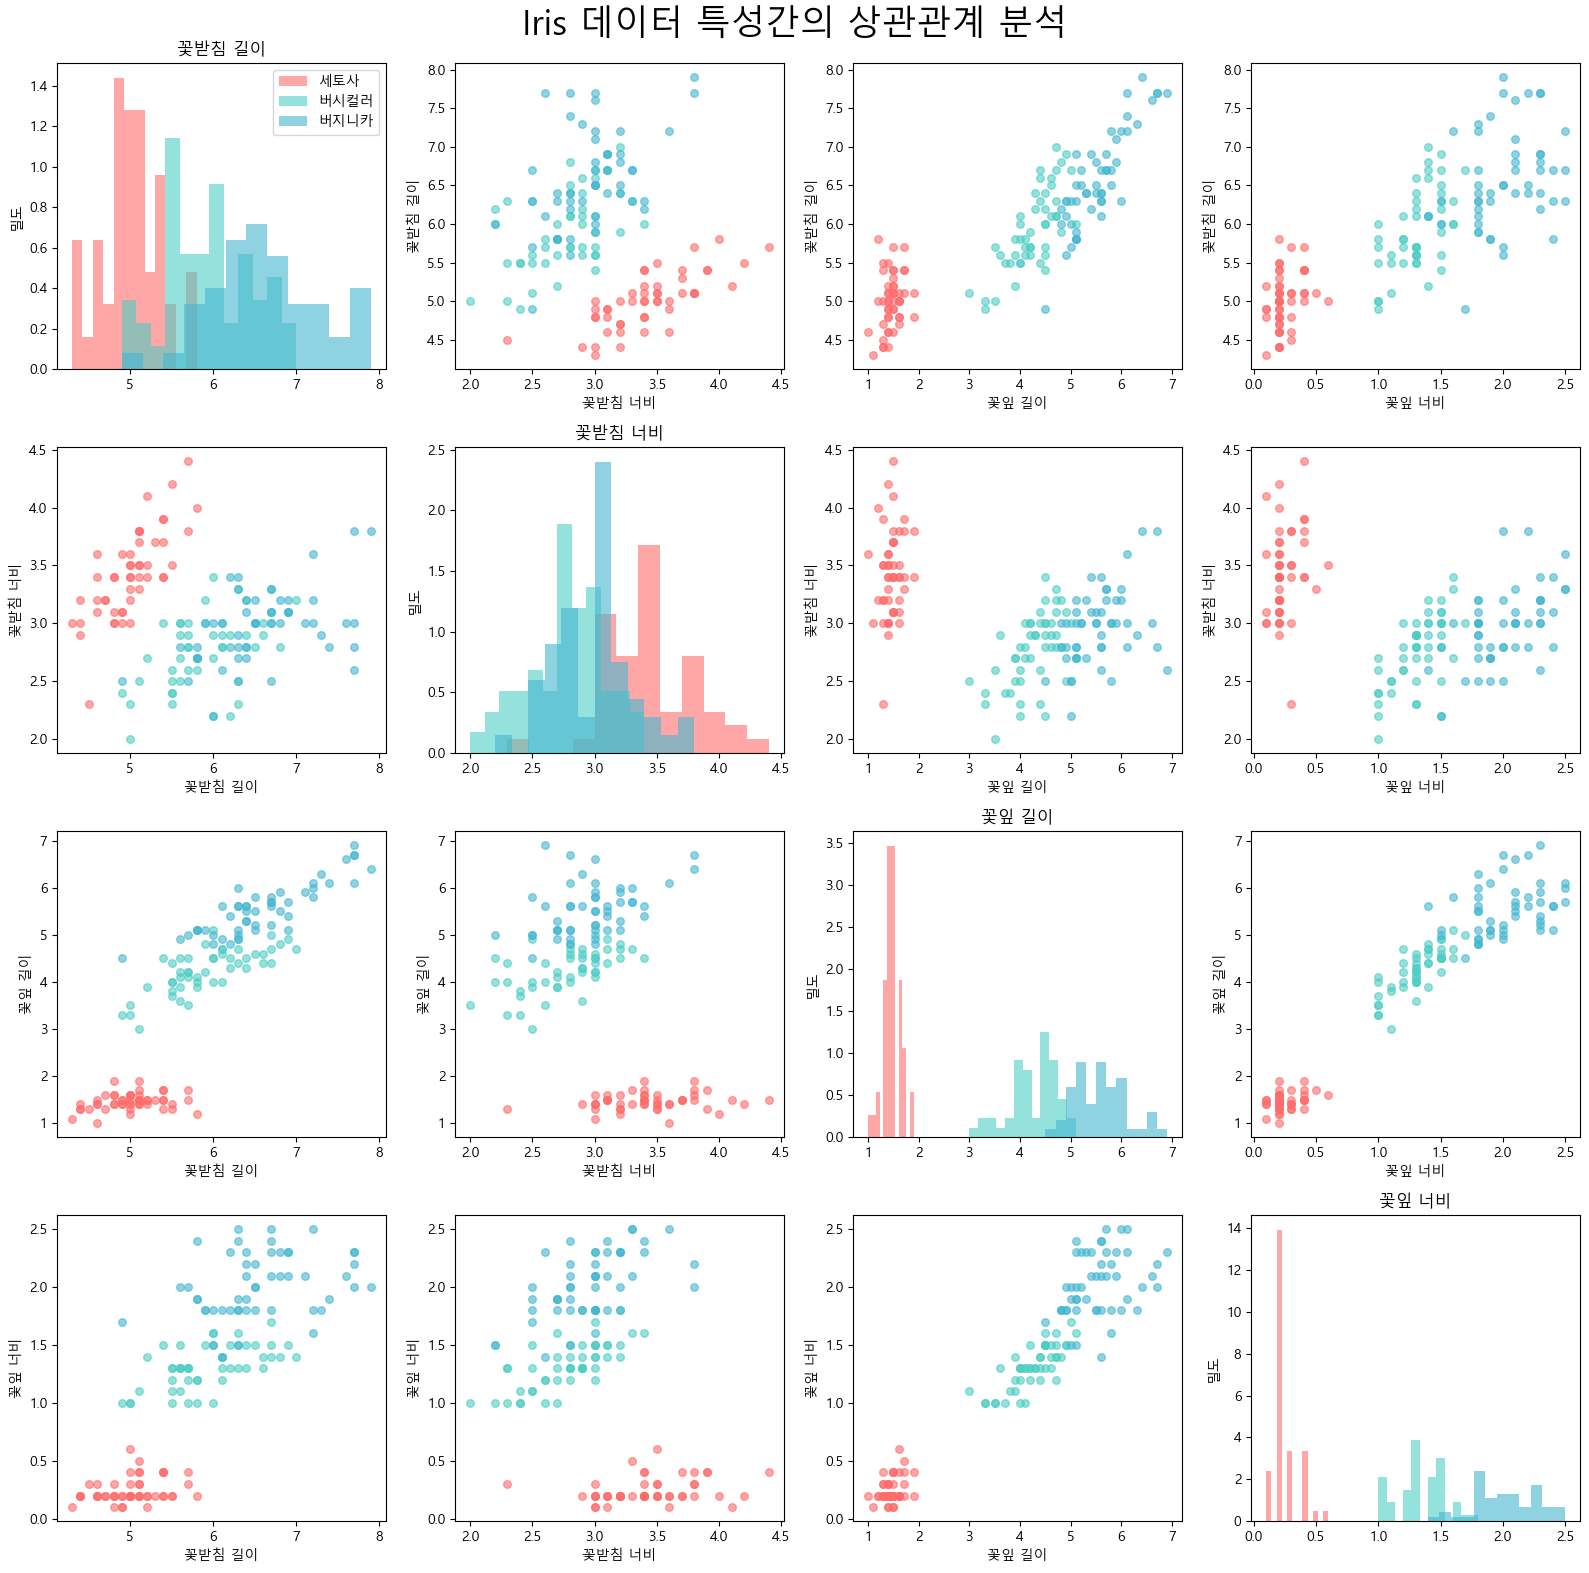

In [109]:
fig, axes = plt.subplots(4,4, figsize=(16,16))
fig.suptitle("Iris 데이터 특성간의 상관관계 분석", fontsize = 25)
print(axes.shape)

for i in range(4):
    for j in range(4):     
       ax = axes[i,j]
       if i==j:
         for k, species in enumerate(target_names):
            data = df[df["species"]==species].iloc[:,i]
            ax.hist(data, 
                    bins = 12, # bins : 구간의 갯수 고정하기
                    color = colors[k],
                    density = True, # 밀도
                    alpha = 0.6, 
                    label = target_names_kr[k]) 
            ax.set_title(feature_names_kr[i])
            ax.set_ylabel("밀도")
            if i == 0:
               ax.legend()
       else:  # i != j 를 산점도로 처리하기
         for k, species in enumerate(target_names):
              data = df[df['species']==species]
              x = data.iloc[:,j]
              y = data.iloc[:,i]
              ax.scatter(x,y,
                        color = colors[k],
                        alpha = 0.6,
                        label = target_names_kr[k],
                        #edgecolors = "black"
                        s=30)
         ax.set_xlabel(feature_names_kr[j])     
         ax.set_ylabel(feature_names_kr[i])
plt.tight_layout()
plt.show()

(4, 4)


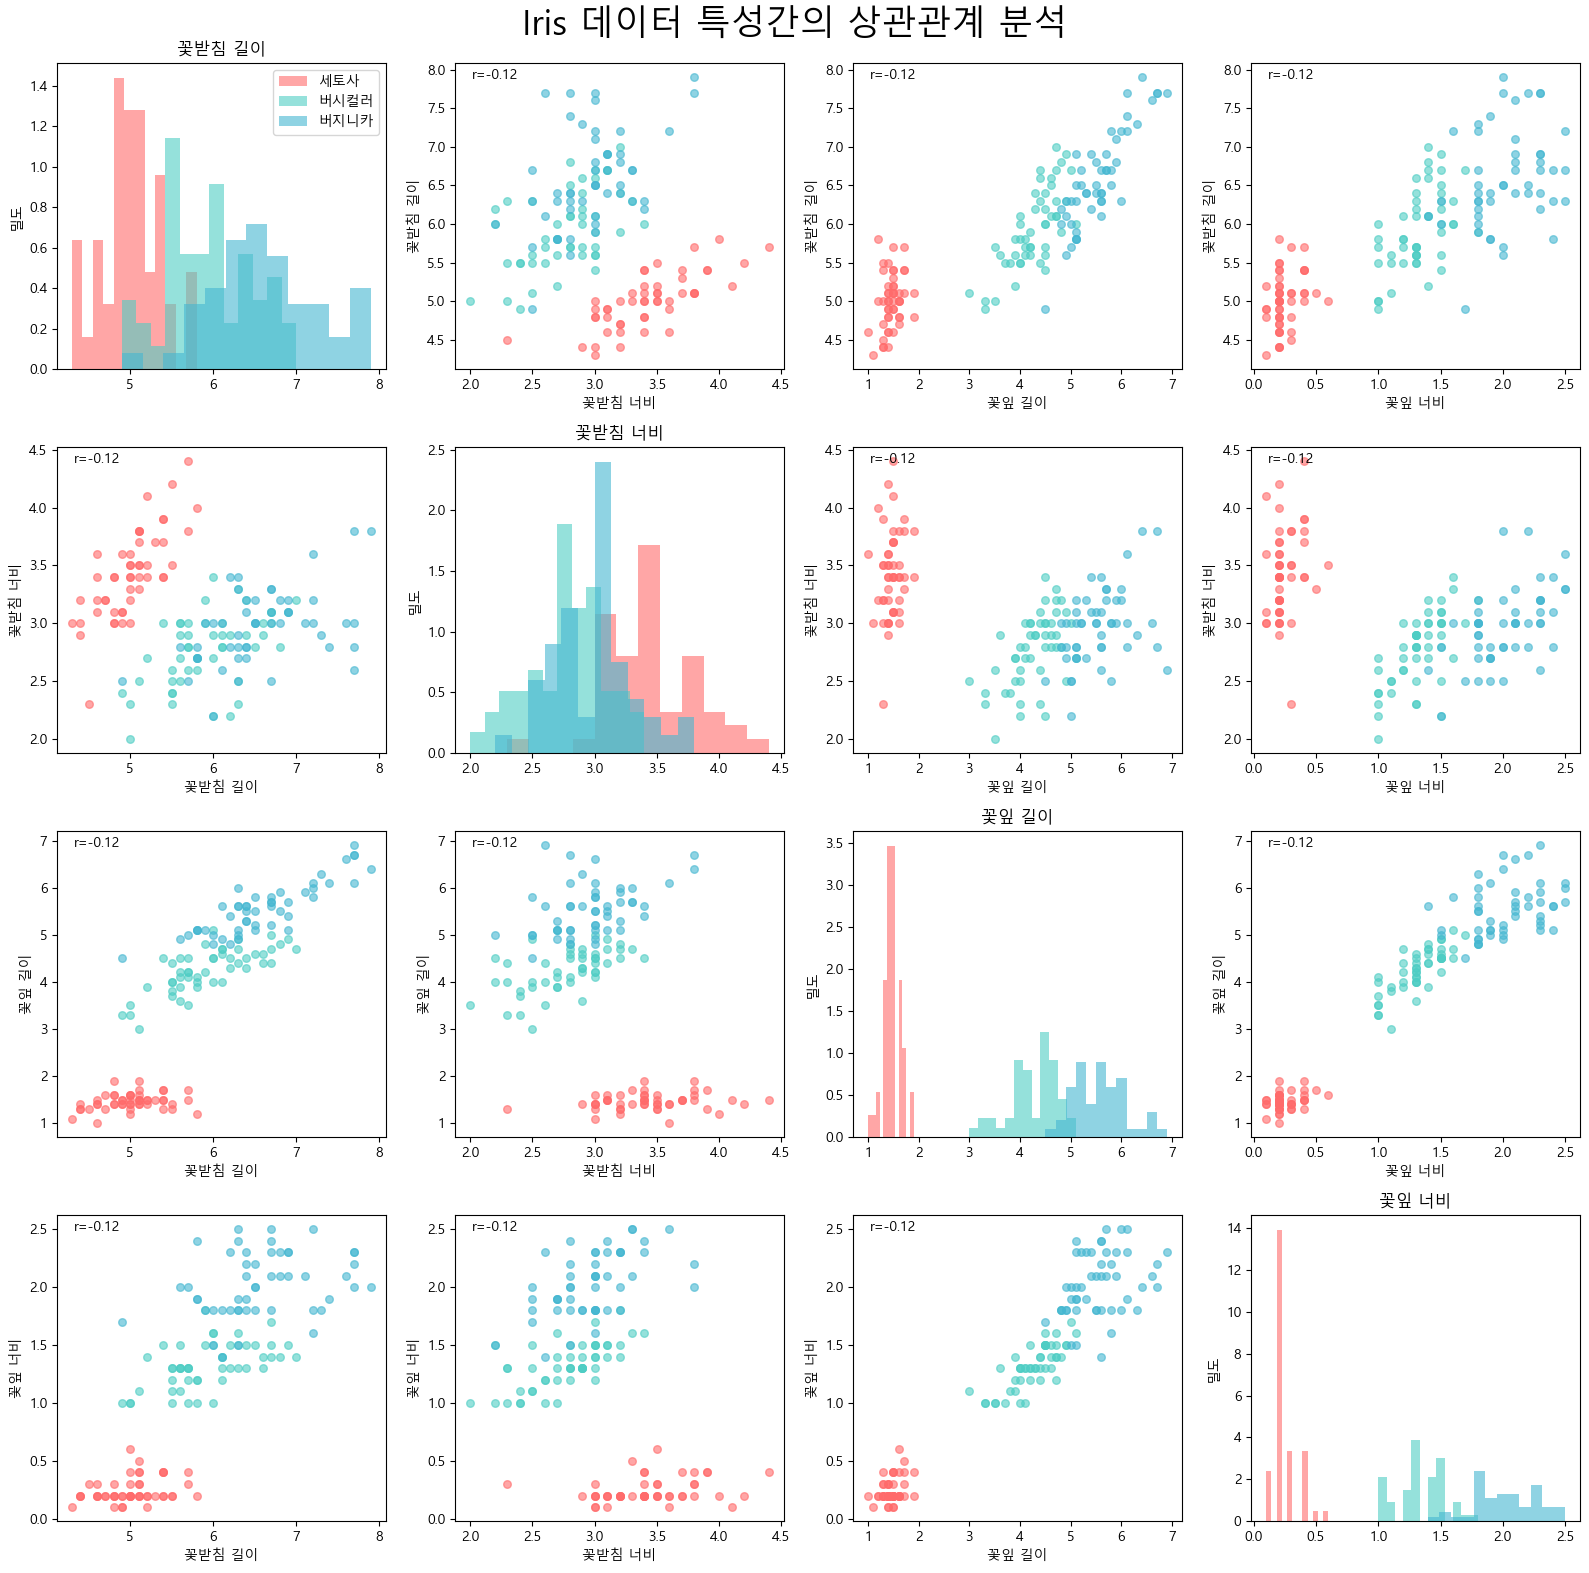

In [ ]:
# corr(상관관계 추가)
# 두 변수 간의 연관성, 즉 한 변수의 변화에 따라 다른 변수가 어떻게 변화하는 경향을 나타내는 통계적 관계
# 두 변수가 함께 움직이는 정도
# 양의 상관관계(함께 증가하거나 감소), 음의 상관관계(하나가 증가할 때 다른 하나는 감소), 또는 상관 없음 
# ***상관관계가 반드시 인과관계를 의미하는 것은 아님*** 

fig, axes = plt.subplots(4,4, figsize=(16,16))
fig.suptitle("Iris 데이터 특성간의 상관관계 분석", fontsize = 25)
print(axes.shape)

for i in range(4):
    for j in range(4):     
       ax = axes[i,j]
       if i==j:
         for k, species in enumerate(target_names):
            data = df[df["species"]==species].iloc[:,i]
            ax.hist(data, 
                    bins = 12, # bins : 구간의 갯수 고정하기
                    color = colors[k],
                    density = True, # 밀도
                    alpha = 0.6, 
                    label = target_names_kr[k]) 
            ax.set_title(feature_names_kr[i])
            ax.set_ylabel("밀도")
            if i == 0:
               ax.legend()
       else:  # i != j 를 산점도로 처리하기
         for k, species in enumerate(target_names):
              data = df[df['species']==species]
              x = data.iloc[:,j]
              y = data.iloc[:,i]
              ax.scatter(x,y,
                        color = colors[k],
                        alpha = 0.6,
                        label = target_names_kr[k],
                        #edgecolors = "black"
                        s=30)
         ax.set_xlabel(feature_names_kr[j])     
         ax.set_ylabel(feature_names_kr[i])

         corr = df.iloc[:,[0,1]].corr().iloc[0,1]
         ax.text(
            0.05,0.95, # 그래프 내부에 텍스트를 사용하고 싶다면, 반드시 이 위치에만 작성할 것
            f"r={corr:.2f}",
            transform = ax.transAxes # 이것도 같이 사용하기 p.312
         )
plt.tight_layout()
plt.show()

In [ ]:
# corr() : 각 변수간의 상관 계수를 반환하는 메서드
df.iloc[:,[0,1]].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [113]:
df.iloc[:,[0,1]].corr().iloc[0,1]

np.float64(-0.11756978413300088)